# Previsão de séries temporais com *ATSPY*

A *ATSpy* é uma biblioteca de *auto time series*, isto é, tem a capacidade de treinar vários modelo de séries temporais.

O objetivo é desenvolver facilmente modelos de série temporal de última geração para prever séries de dados univariadas. Basta carregar seus dados e selecionar quais modelos deseja testar. Este é o maior repositório de modelos de séries temporais estruturais e de aprendizado de máquina automatizados.

Os modelos dessa biblioteca são:

1) ```ARIMA``` - Modelagem ARIMA Automatizada;

2) ```Prophet``` - Modelando Sazonalidade Múltipla com Crescimento Linear ou Não Linear;

3) ```HWAAS``` - Suavização exponencial com tendência aditiva e sazonalidade aditiva;

4) ```HWAMS``` - Suavização exponencial com tendência aditiva e sazonalidade multiplicativa;

5) ```NBEATS``` - Análise de expansão da base neural (agora fixada em 20 épocas);

6) ```Gluonts``` - modelo baseado em RNN (agora fixado em 20 épocas);

7) ```TATS``` - Sazonal e tendência no Box Cox;

8) ```TBAT``` - Trend e Box Cox;

9) ```TBATS1``` - Tendência, Sazonal (um) e Box Cox;

10) ```TBATP1``` - TBATS1, mas a inferência sazonal é codificada por periodicidade

11) ```TBATS2``` - TBATS1 com dois períodos sazonais

## Instalação da biblioteca

In [2]:
pip install atspy

## Importação das bibliotecas e módulos

In [122]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from atspy import AutomatedModel

from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_log_error, median_absolute_error, r2_score

## Importação dos dados

In [6]:
df=pd.read_csv('MRTSSM4453USN.csv')
df.DATE = pd.to_datetime(df.DATE)
df = df.set_index("DATE")
df.head()

,MRTSSM4453USN
DATE,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822


últimas linhas da série temporal.

In [115]:
df.tail()

,MRTSSM4453USN
DATE,
2020-07-01,6423
2020-08-01,6099
2020-09-01,5855
2020-10-01,6050
2020-11-01,6088


Dimensão da base de dados.

In [7]:
df.shape

(347, 1)

Não há valores faltantes.

In [116]:
df.isna().sum()

MRTSSM4453USN    0
dtype: int64

Tipo dos dados.

In [117]:
df.dtypes

MRTSSM4453USN    int64
dtype: object

Tabela estatística da base de dados.

In [118]:
df.describe()

,MRTSSM4453USN
count,347.000000
mean,3130.357349
std,1156.339445
min,1501.000000
25%,2136.000000
50%,2924.000000
75%,3815.000000
max,6630.000000


Gráfico da série temporal.

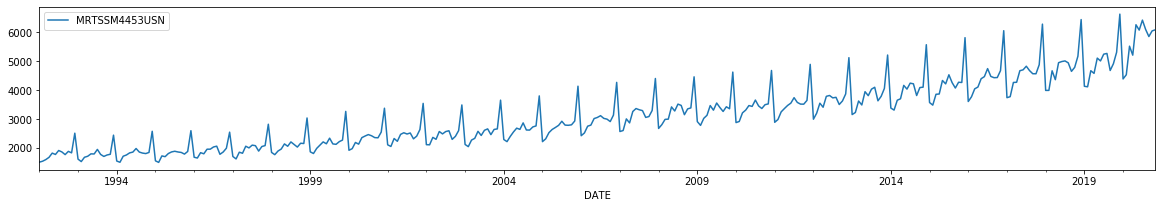

In [120]:
df.plot(figsize=(20,3));

## Modelagem

In [22]:
#criando uma lista com os modelos
model_list = ["ARIMA", "HWAMS","HWAAS","TBAT", "TATS","TBATS1", "TBATP1", "TBATS1", "TBATS2"]

#Para treino dos modelos será usada uma base de dados sem as últimas 50 observações
am = AutomatedModel(df=df[:-50], model_list=model_list, forecast_len=50)

### Análise dentro da amostra

A primeira etapa da modelagem é encontrar o(s) modelo(s) que melhor modelem a base de treino. Abaixo, o código irá gerar as previsões para toda série de treino com todos os modelos e o desempenho de cada um desses valores por meio das métricas de avaliação *rmse* e *mse*.


In [23]:
previsoes, desempenho = am.forecast_insample()
previsoes

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
222
An insample split of training size 222 and testing size 75 has been constructed
Model ARIMA is being trained for in sample prediction
Model HWAMS is being trained for in sample prediction
Model HWAAS is being trained for in sample prediction
Model TBAT is being trained for in sample prediction


INFO:numexpr.utils:NumExpr defaulting to 2 threads.


Model TATS is being trained for in sample prediction
The following set of plausible SSA seasonalities have been identified: {6}
Model TBATS1 is being trained for in sample prediction
Model TBATP1 is being trained for in sample prediction
Model TBATS1 is being trained for in sample prediction
Model TBATS2 is being trained for in sample prediction
The following set of plausible SSA seasonalities have been identified: {4, 6}
Model ARIMA is being used to forcast in sample
Model HWAMS is being used to forcast in sample
Model HWAAS is being used to forcast in sample
Model TBAT is being used to forcast in sample
Model TATS is being used to forcast in sample
Model TBATS1 is being used to forcast in sample
Model TBATP1 is being used to forcast in sample
Model TBATS2 is being used to forcast in sample
Successfully finished in sample forecast


,Target,ARIMA,HWAMS,HWAAS,TBAT,TATS,TBATS1,TBATP1,TBATS2
Date,,,,,,,,,
2010-07-01,3657,3592.601877,3077.659704,3078.164420,3355.812436,3299.932427,3299.932427,3701.832679,3386.444063
2010-08-01,3454,3512.672189,3027.804178,3028.510070,3362.542958,3071.626654,3071.626654,3419.616034,3308.881246
2010-09-01,3365,3365.875451,3115.271446,3115.812673,3368.051196,3283.192905,3283.192905,3404.957256,3180.831478
2010-10-01,3497,3533.865596,3195.984309,3196.290860,3372.557620,3184.608144,3184.608144,3343.063840,2944.695508
2010-11-01,3524,3420.704204,3435.994570,3435.573653,3376.243430,3520.506321,3520.506321,3628.161418,3630.755266
...,...,...,...,...,...,...,...,...,...
2016-05-01,4396,3914.860981,3423.613239,3423.226302,3392.737730,3478.959625,3478.959625,3827.370090,3393.283169
2016-06-01,4468,3820.630343,3928.509162,3926.833226,3392.737735,3835.540660,3835.540660,3612.524191,3575.348350
2016-07-01,4745,4050.775351,3056.885492,3057.418753,3392.737739,3232.993232,3232.993232,3965.703300,3344.466918


Métricas de avaliação para cada modelo: o melhor modelo foi o ARIMA, seguido do TBATS1.

In [24]:
desempenho

,Target,ARIMA,HWAMS,HWAAS,TBAT,TATS,TBATS1,TBATP1,TBATS2
rmse,0.00,299.568132,769.241011,769.217210,750.411127,740.128638,740.128638,392.637217,685.896194
mse,0.00,89741.065557,591731.733489,591695.115783,563116.860155,547790.400190,547790.400190,154163.984097,470453.588573
mean,3891.88,3683.860889,3276.574837,3276.609703,3390.042111,3323.671523,3323.671523,3603.843409,3344.929976


### Gráficos das séries (original e dos modelos)

Original e ARIMA.

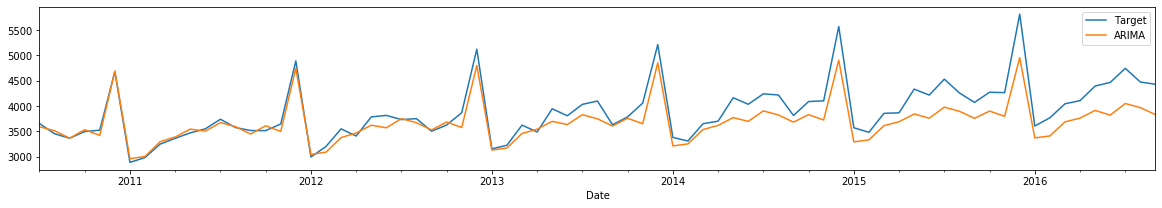

In [123]:
previsoes['Target'].plot(figsize=(20,3))
previsoes['ARIMA'].plot()
plt.legend();

Original e HWAMS.

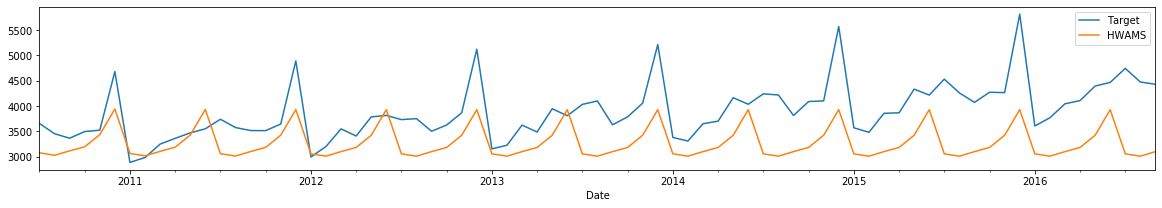

In [124]:
previsoes['Target'].plot(figsize=(20,3))
previsoes['HWAMS'].plot()
plt.legend();

Original e HWAAS.

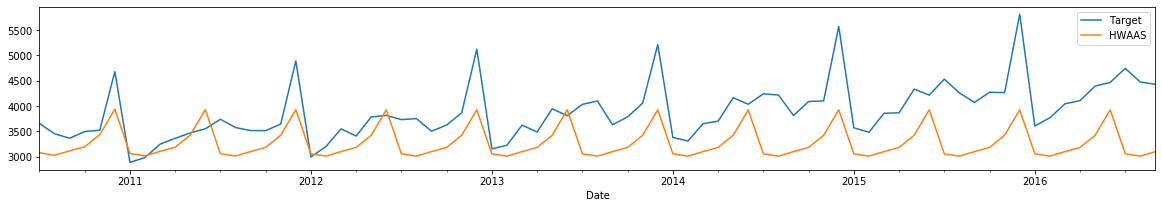

In [125]:
previsoes['Target'].plot(figsize=(20,3))
previsoes['HWAAS'].plot()
plt.legend();

Original e TBAT.

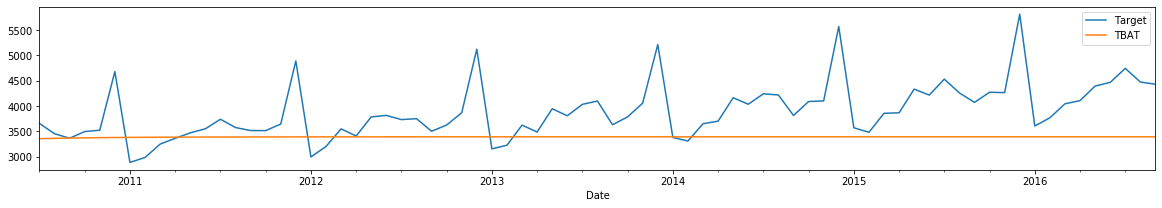

In [126]:
previsoes['Target'].plot(figsize=(20,3))
previsoes['TBAT'].plot()
plt.legend();

Original e TATS.

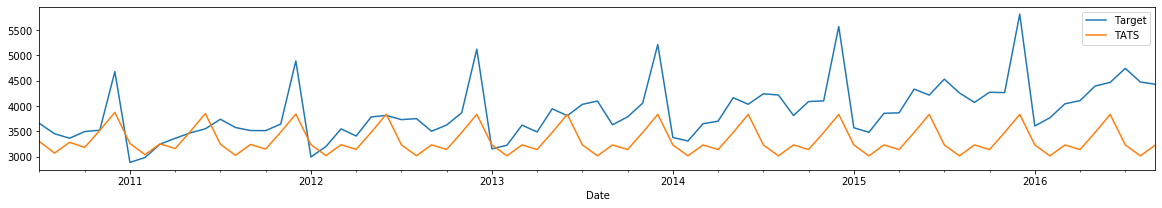

In [127]:
previsoes['Target'].plot(figsize=(20,3))
previsoes['TATS'].plot()
plt.legend();

Original e TBATS1.

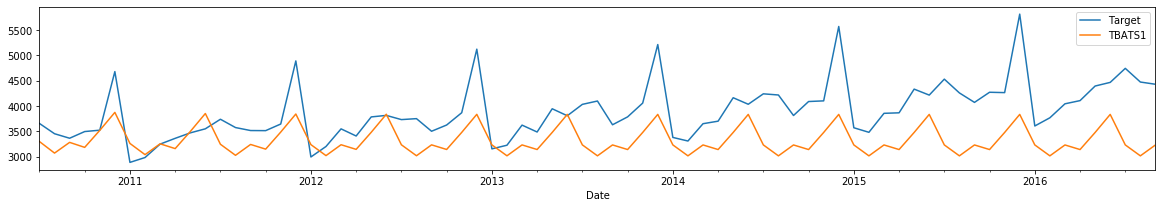

In [128]:
previsoes['Target'].plot(figsize=(20,3))
previsoes['TBATS1'].plot()
plt.legend();

Original e TBATP1.

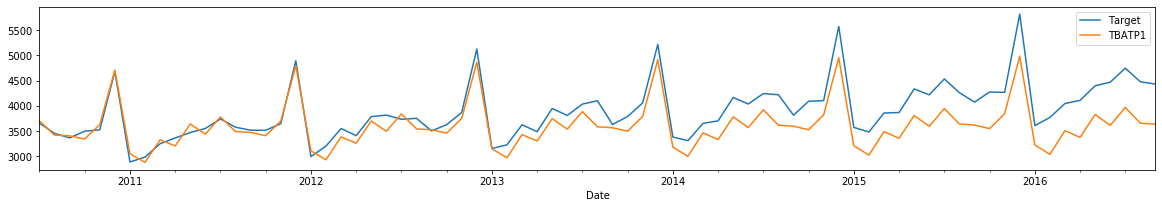

In [129]:
previsoes['Target'].plot(figsize=(20,3))
previsoes['TBATP1'].plot()
plt.legend();

Original e TBATS2.

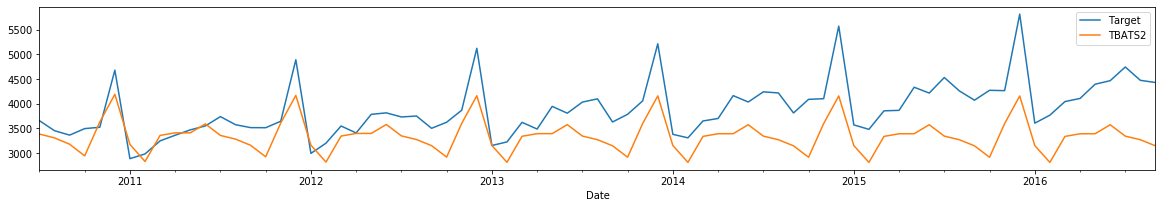

In [130]:
previsoes['Target'].plot(figsize=(20,3))
previsoes['TBATS2'].plot()
plt.legend();

### Análise fora da amostra

Agora é necessário avaliar o desempenho dos modelos em gerar previsões para os períodos de tempo fora dos dados de treinamento.

In [52]:
previsoes2 = am.forecast_outsample()
previsoes2

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction
Model HWAMS is being trained for out of sample prediction
Model HWAAS is being trained for out of sample prediction
Model TBAT is being trained for out of sample prediction
Model TATS is being trained for out of sample prediction
The following set of plausible SSA seasonalities have been identified: {6}
Model TBATS1 is being trained for out of sample prediction
Model TBATP1 is being trained for out of sample prediction
Model TBATS1 is being trained for out of sample prediction
Model TBATS2 is being trained for out of sample prediction
The following set of plausible SSA seasonalities have been identified: {4, 6}
Model ARIMA is being used to forcast out of sample
Model HWAMS is being used to forcast out of sample
Model HWAAS is being used to forcast out of sample
Model TBAT is be

,ARIMA,HWAMS,HWAAS,TBAT,TATS,TBATS1,TBATP1,TBATS2
2016-10-01,4498.700520,4258.608078,4260.212170,4302.203081,4086.530508,4086.530508,4335.678506,3843.590920
2016-11-01,4526.829250,4560.660117,4554.775400,4333.275912,4548.862913,4548.862913,4701.593704,4724.252217
2016-12-01,6054.581969,5225.595913,5203.318102,4358.592027,5020.854885,5020.854885,6026.176158,5425.358744
2017-01-01,3877.848355,4199.626063,4202.092271,4379.192376,4287.246978,4287.246978,3990.807073,4190.106717
2017-02-01,4037.501427,4146.939284,4151.594382,4395.938566,4039.457716,4039.457716,3805.358161,3783.612314
2017-03-01,4309.654050,4213.791908,4217.169194,4409.540620,4320.162484,4320.162484,4388.652124,4470.385094
2017-04-01,4371.914791,4310.145217,4311.347831,4420.581590,4205.754814,4205.754814,4226.905285,4534.767072
2017-05-01,4655.931329,4610.686796,4604.110621,4429.538922,4661.853001,4661.853001,4808.974888,4549.530268
2017-06-01,4727.821001,5278.259947,5254.648081,4436.802706,5127.130877,5127.130877,4562.675070,4799.506634
2017-07-01,4999.850292,4235.840707,4238.082359,4442.691082,4366.050138,4366.050138,5007.830840,4518.703335


### Gráficos dos valores originais e das previsões

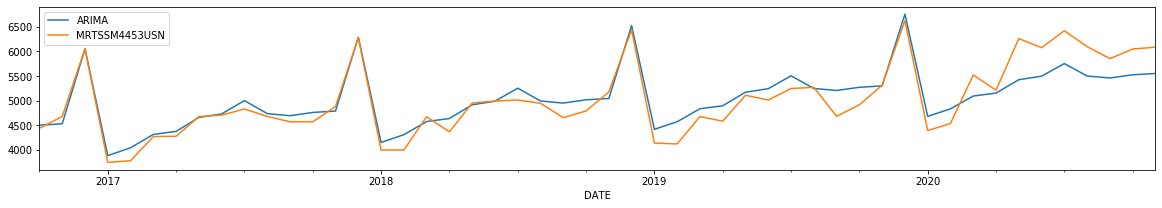

In [131]:
previsoes2['ARIMA'].plot(figsize=(20,3))
df[-50:]['MRTSSM4453USN'].plot()
plt.legend();

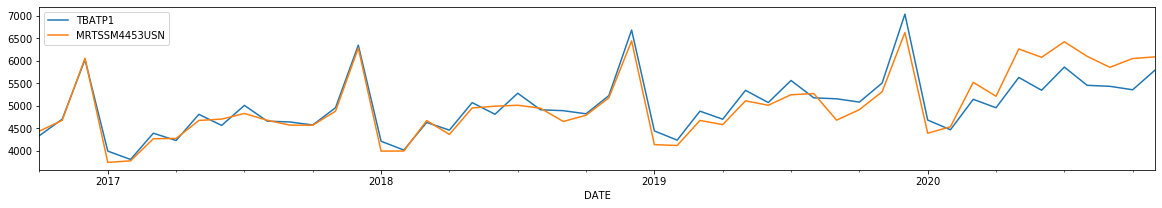

In [132]:
previsoes2['TBATP1'].plot(figsize=(20,3))		
df[-50:]['MRTSSM4453USN'].plot()
plt.legend();

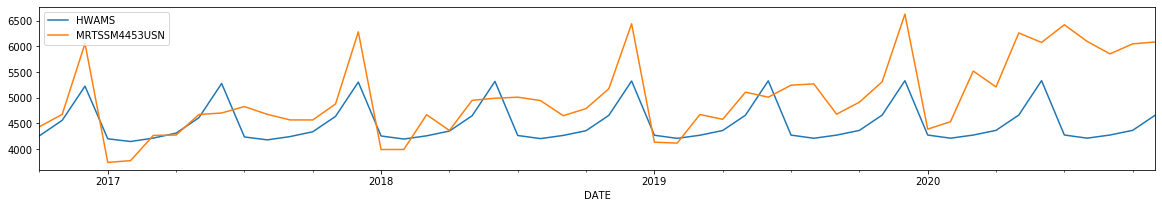

In [133]:
previsoes2['HWAMS'].plot(figsize=(20,3))
df[-50:]['MRTSSM4453USN'].plot()
plt.legend();

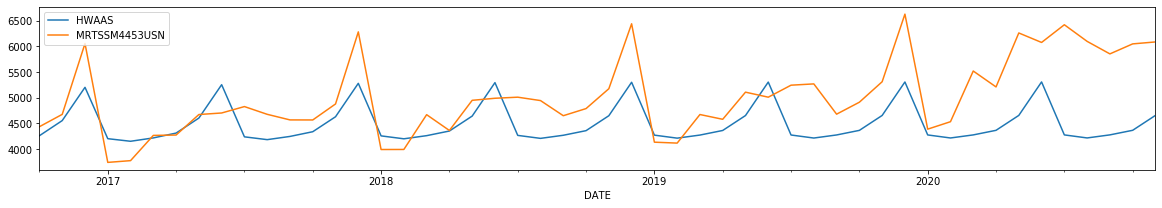

In [134]:
previsoes2['HWAAS'].plot(figsize=(20,3))
df[-50:]['MRTSSM4453USN'].plot()
plt.legend();

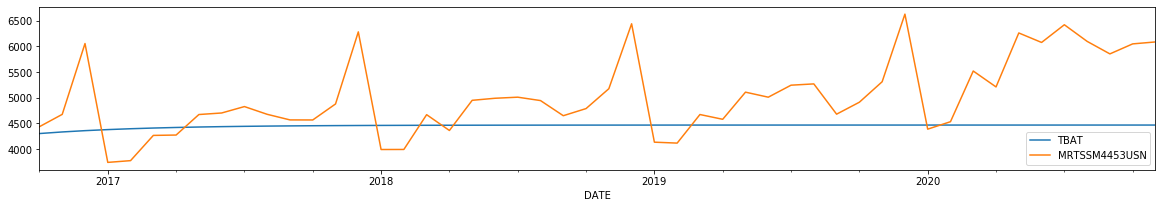

In [135]:
previsoes2['TBAT'].plot(figsize=(20,3))		
df[-50:]['MRTSSM4453USN'].plot()
plt.legend();

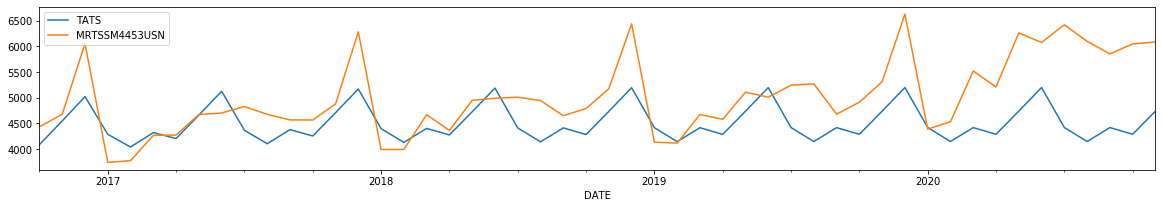

In [136]:
previsoes2['TATS'].plot(figsize=(20,3))		
df[-50:]['MRTSSM4453USN'].plot()
plt.legend();

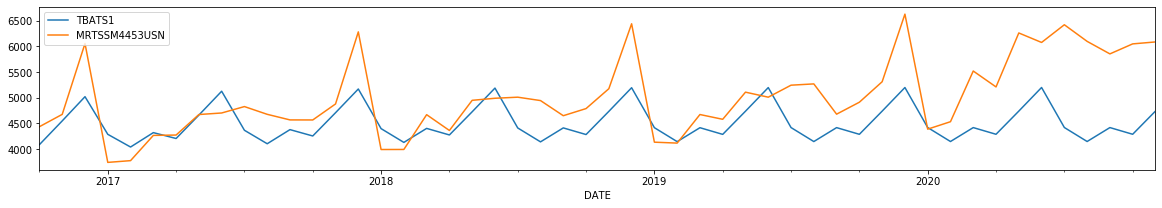

In [137]:
previsoes2['TBATS1'].plot(figsize=(20,3))		
df[-50:]['MRTSSM4453USN'].plot()
plt.legend();

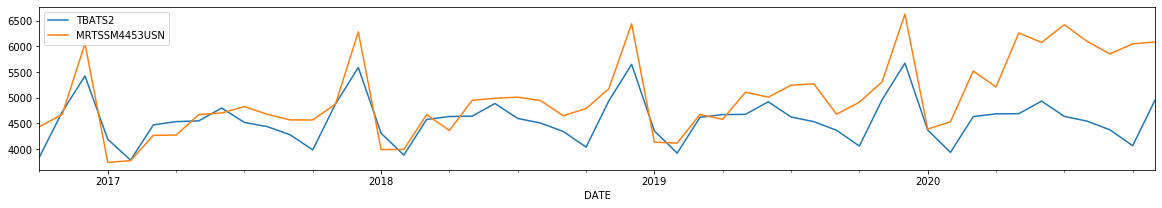

In [138]:
previsoes2['TBATS2'].plot(figsize=(20,3))		
df[-50:]['MRTSSM4453USN'].plot()
plt.legend();

### Métricas de avaliação de cada modelo para fora da amostra

Criando uma função para calcular todas as métricas de avaliação.

In [101]:
def metricas(modelo):
  print('Variância Explicada do modelo',modelo,': ',round(explained_variance_score(previsoes2[modelo],df[-50:]['MRTSSM4453USN'])*100,3))
  print('Erro Médio Absoluto do modelo',modelo,': ',round(mean_absolute_error(previsoes2[modelo],df[-50:]['MRTSSM4453USN'])*100,3))
  print('Erro Médio Quadrado do modelo',modelo,': ',round(mean_squared_error(previsoes2[modelo],df[-50:]['MRTSSM4453USN'])*100,3))
  print('Erro Logarítmico Quadrado Médio do modelo',modelo,': ',round(mean_squared_log_error(previsoes2[modelo],df[-50:]['MRTSSM4453USN'])*100,3))
  print('Erro Absoluto Mediano do modelo',modelo,': ',round(median_absolute_error(previsoes2[modelo],df[-50:]['MRTSSM4453USN'])*100,3))
  print('Coeficiente de Determinação (R²) do modelo',modelo,': ',round(r2_score(previsoes2[modelo],df[-50:]['MRTSSM4453USN'])*100,3),'%')

Abaixo temos os resultados dos modelos de melhor para o pior e observa-se que o modelo **TBATP1**

In [102]:
metricas('TBATP1')

Variância Explicada do modelo TBATP1 :  81.316
Erro Médio Absoluto do modelo TBATP1 :  21030.283
Erro Médio Quadrado do modelo TBATP1 :  7959958.373
Erro Logarítmico Quadrado Médio do modelo TBATP1 :  0.27
Erro Absoluto Mediano do modelo TBATP1 :  15437.369
Coeficiente de Determinação (R²) do modelo TBATP1 :  81.312 %


In [103]:
metricas('ARIMA')

Variância Explicada do modelo ARIMA :  73.679
Erro Médio Absoluto do modelo ARIMA :  22764.224
Erro Médio Quadrado do modelo ARIMA :  9065611.369
Erro Logarítmico Quadrado Médio do modelo ARIMA :  0.328
Erro Absoluto Mediano do modelo ARIMA :  16612.313
Coeficiente de Determinação (R²) do modelo ARIMA :  73.566 %


In [104]:
metricas('TBATS2')

Variância Explicada do modelo TBATS2 :  -65.458
Erro Médio Absoluto do modelo TBATS2 :  52518.665
Erro Médio Quadrado do modelo TBATS2 :  50866218.92
Erro Logarítmico Quadrado Médio do modelo TBATS2 :  1.938
Erro Absoluto Mediano do modelo TBATS2 :  33340.133
Coeficiente de Determinação (R²) do modelo TBATS2 :  -171.9 %


In [105]:
metricas('HWAMS')

Variância Explicada do modelo HWAMS :  -169.587
Erro Médio Absoluto do modelo HWAMS :  62336.126
Erro Médio Quadrado do modelo HWAMS :  65751648.614
Erro Logarítmico Quadrado Médio do modelo HWAMS :  2.518
Erro Absoluto Mediano do modelo HWAMS :  43995.756
Coeficiente de Determinação (R²) do modelo HWAMS :  -348.139 %


In [106]:
metricas('HWAAS')

Variância Explicada do modelo HWAAS :  -184.092
Erro Médio Absoluto do modelo HWAAS :  62471.776
Erro Médio Quadrado do modelo HWAAS :  66114534.686
Erro Logarítmico Quadrado Médio do modelo HWAAS :  2.528
Erro Absoluto Mediano do modelo HWAAS :  44317.919
Coeficiente de Determinação (R²) do modelo HWAAS :  -374.735 %


In [107]:
metricas('TATS')

Variância Explicada do modelo TATS :  -233.454
Erro Médio Absoluto do modelo TATS :  60939.246
Erro Médio Quadrado do modelo TATS :  64881385.562
Erro Logarítmico Quadrado Médio do modelo TATS :  2.457
Erro Absoluto Mediano do modelo TATS :  41568.33
Coeficiente de Determinação (R²) do modelo TATS :  -452.006 %


In [108]:
metricas('TBATS1')

Variância Explicada do modelo TBATS1 :  -233.454
Erro Médio Absoluto do modelo TBATS1 :  60939.246
Erro Médio Quadrado do modelo TBATS1 :  64881385.562
Erro Logarítmico Quadrado Médio do modelo TBATS1 :  2.457
Erro Absoluto Mediano do modelo TBATS1 :  41568.33
Coeficiente de Determinação (R²) do modelo TBATS1 :  -452.006 %


In [109]:
metricas('TBAT')

Variância Explicada do modelo TBAT :  -41419.624
Erro Médio Absoluto do modelo TBAT :  69509.053
Erro Médio Quadrado do modelo TBAT :  85393407.601
Erro Logarítmico Quadrado Médio do modelo TBAT :  3.215
Erro Absoluto Mediano do modelo TBAT :  47444.22
Coeficiente de Determinação (R²) do modelo TBAT :  -65619.764 %


### Dicionário dos modelos usados

In [110]:
am.models_dict_in

{'ARIMA': ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 1), out_of_sample_size=0,
       scoring='mse', scoring_args=None, seasonal_order=(2, 0, 1, 6),
       start_params=None, suppress_warnings=False, trend=None,
       with_intercept=True),
 'HWAAS': <statsmodels.tsa.holtwinters.HoltWintersResultsWrapper at 0x7fb9c7235490>,
 'HWAMS': <statsmodels.tsa.holtwinters.HoltWintersResultsWrapper at 0x7fb9c7589a10>,
 'TATS': <tbats.tbats.Model.Model at 0x7fb9c5845ed0>,
 'TBAT': <tbats.tbats.Model.Model at 0x7fb9c7653310>,
 'TBATP1': <tbats.tbats.Model.Model at 0x7fb9cd088f10>,
 'TBATS1': <tbats.tbats.Model.Model at 0x7fb9caafde50>,
 'TBATS2': <tbats.tbats.Model.Model at 0x7fb9c58453d0>}

In [111]:
am.models_dict_out

{'ARIMA': ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 3), out_of_sample_size=0,
       scoring='mse', scoring_args=None, seasonal_order=(2, 0, 0, 6),
       start_params=None, suppress_warnings=False, trend=None,
       with_intercept=True),
 'HWAAS': <statsmodels.tsa.holtwinters.HoltWintersResultsWrapper at 0x7fb9be26bcd0>,
 'HWAMS': <statsmodels.tsa.holtwinters.HoltWintersResultsWrapper at 0x7fb9bc930d90>,
 'TATS': <tbats.tbats.Model.Model at 0x7fb9be2cd290>,
 'TBAT': <tbats.tbats.Model.Model at 0x7fb9be25df90>,
 'TBATP1': <tbats.tbats.Model.Model at 0x7fb9be2a1410>,
 'TBATS1': <tbats.tbats.Model.Model at 0x7fb9bc914250>,
 'TBATS2': <tbats.tbats.Model.Model at 0x7fb9bc6a9810>}

## Retreino do modelo

Dado que o modelo TBATP1 foi o segundo melhor modelo na análise dentro da amostra e o melhor dentro da amostra, vamos usá-lo retreinado com todos os dados da série temporal e gerar previsões para um período de tempo desconhecido.

In [143]:
#Para retreino do modelo
am2 = AutomatedModel(df=df, model_list=['TBATP1'], forecast_len=12)

Previsões dentro da amostra.

In [144]:
previsoes3, desempenho2 = am2.forecast_insample()
previsoes3

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
260
An insample split of training size 260 and testing size 87 has been constructed
Model TBATP1 is being trained for in sample prediction
Model TBATP1 is being used to forcast in sample
Successfully finished in sample forecast


,Target,TBATP1
Date,,
2013-09-01,3631,3846.973431
2013-10-01,3787,3780.917252
2013-11-01,4059,4113.944399
2013-12-01,5215,5310.807795
2014-01-01,3381,3474.507056
...,...,...
2020-07-01,6423,6013.415404
2020-08-01,6099,5597.118400
2020-09-01,5855,5585.679676


Desempenho do novo modelo.

In [145]:
desempenho2

,Target,TBATP1
rmse,0.000000,252.173134
mse,0.000000,63591.289618
mean,4645.091954,4751.273397


Previsões fora da amostra.

In [146]:
previsoes4 = am2.forecast_outsample()
previsoes4

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model TBATP1 is being trained for out of sample prediction
Model TBATP1 is being used to forcast out of sample
Successfully finished out of sample forecast


,TBATP1
2020-12-01,8094.098834
2021-01-01,5468.329189
2021-02-01,5274.693413
2021-03-01,6129.801240
2021-04-01,5925.027911
2021-05-01,6784.374511
2021-06-01,6500.446343
2021-07-01,7130.560309
2021-08-01,6707.139003
2021-09-01,6701.937636


Gráfico com a série original, a séries modelada e as previsões.

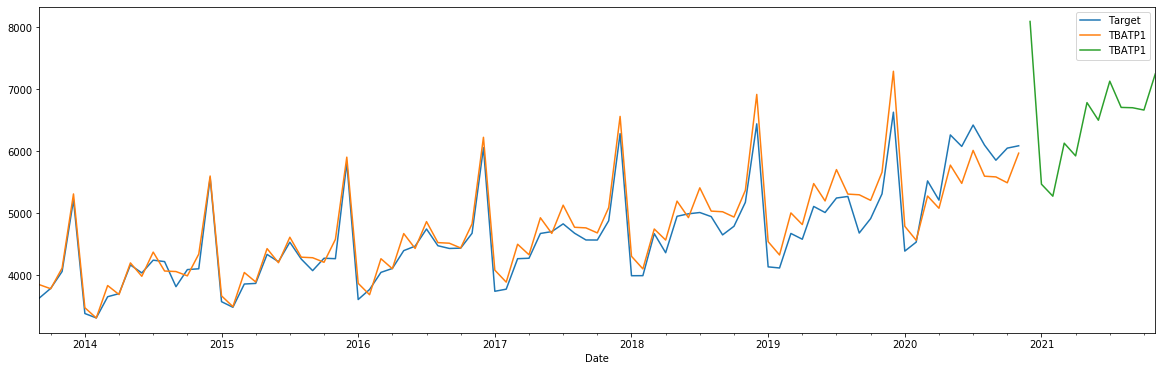

In [151]:
previsoes3.plot(figsize=(20,6))
previsoes4['TBATP1'].plot()
plt.legend();

## Conclusão

Com poucas linhas de código foi possível gerar vários modelos e avaliar qual o melhor modelo para prever valores da nossa série temporal.